In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
plt.style.use('dark_background')

# Load Data

In [2]:
x_train = np.load('datasets/x_train.npy').astype(np.float32)
y_train = np.load('datasets/y_train.npy').astype(np.float32)
x_val = np.load('datasets/x_val.npy').astype(np.float32)
y_val = np.load('datasets/y_val.npy').astype(np.float32)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(3040, 26, 34, 1) (3040, 1)
(338, 26, 34, 1) (338, 1)


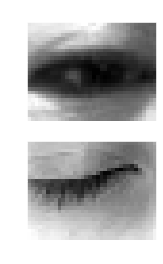

In [3]:
plt.subplot(2, 1, 1)
plt.title(str(y_train[0]))
plt.imshow(x_train[0].reshape((26, 34)), cmap='gray')
plt.subplot(2, 1, 2)
plt.title(str(y_val[4]))
plt.imshow(x_val[4].reshape((26, 34)), cmap='gray')

# Data Augmentation

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(
    x=x_train, y=y_train,
    batch_size=32,
    shuffle=True
)

val_generator = val_datagen.flow(
    x=x_val, y=y_val,
    batch_size=32,
    shuffle=False
)


# Build Model

In [5]:
inputs = Input(shape=(26,34,1))

net = Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(inputs)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Flatten()(net)

net = Dense(512)(net)

net = Activation('relu')(net)
net = Dense(1)(net)

outputs = Activation('sigmoid')(net)

model = Model(inputs = inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 26, 34, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 34, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 17, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 17, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 8, 64)         0         
 2D)                                                             
                                              

2022-05-18 21:08:33.032734: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-18 21:08:33.032922: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model.fit_generator(
    train_generator, epochs=50, validation_data=val_generator,
    callbacks=[
        ModelCheckpoint('models.h5' , monitor='val_acc', save_best_only=True, mode='max', verbose=1),
        ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=10, verbose=1, mode='auto', min_lr=1e-05)
    ]
)

Epoch 1/50


/var/folders/1t/88mj6ftx7kzcj3p0wtqxbcl40000gn/T/ipykernel_3879/2104269877.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(
2022-05-18 21:10:11.624416: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-18 21:10:11.871476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


91/95 [===========================>..] - ETA: 0s - loss: 0.4753 - acc: 0.7606
Epoch 1: val_acc improved from -inf to 0.93787, saving model to models.h5
95/95 [==============================] - 2s 12ms/step - loss: 0.4673 - acc: 0.7651 - val_loss: 0.1774 - val_acc: 0.9379 - lr: 0.0010
Epoch 2/50
 1/95 [..............................] - ETA: 1s - loss: 0.2042 - acc: 0.9062

2022-05-18 21:10:13.154759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


91/95 [===========================>..] - ETA: 0s - loss: 0.1864 - acc: 0.9299
Epoch 2: val_acc improved from 0.93787 to 0.98521, saving model to models.h5
95/95 [==============================] - 1s 10ms/step - loss: 0.1813 - acc: 0.9322 - val_loss: 0.0732 - val_acc: 0.9852 - lr: 0.0010
Epoch 3/50
92/95 [============================>.] - ETA: 0s - loss: 0.0990 - acc: 0.9654
Epoch 3: val_acc did not improve from 0.98521
95/95 [==============================] - 1s 10ms/step - loss: 0.0985 - acc: 0.9655 - val_loss: 0.0749 - val_acc: 0.9793 - lr: 0.0010
Epoch 4/50
92/95 [============================>.] - ETA: 0s - loss: 0.0870 - acc: 0.9718
Epoch 4: val_acc improved from 0.98521 to 0.98817, saving model to models.h5
95/95 [==============================] - 1s 10ms/step - loss: 0.0870 - acc: 0.9714 - val_loss: 0.0774 - val_acc: 0.9882 - lr: 0.0010
Epoch 5/50
90/95 [===========================>..] - ETA: 0s - loss: 0.0632 - acc: 0.9799
Epoch 5: val_acc did not improve from 0.98817
95/95 [===

2022-05-18 21:11:45.604815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/var/folders/1t/88mj6ftx7kzcj3p0wtqxbcl40000gn/T/ipykernel_3879/879855913.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred_logical = (y_pred > 0.5).astype(np.int)


test acc: 0.9940828402366864


<AxesSubplot:>

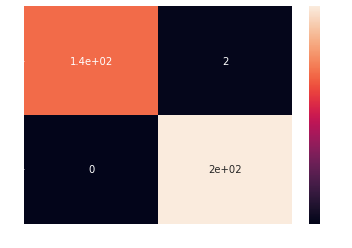

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

model = load_model('models.h5')

y_pred = model.predict(x_val/255.)
y_pred_logical = (y_pred > 0.5).astype(np.int)

print ('test acc: %s' % accuracy_score(y_val, y_pred_logical))
cm = confusion_matrix(y_val, y_pred_logical)
sns.heatmap(cm, annot=True)